<a href="https://colab.research.google.com/github/Mannienox/ArewaDS-Deep-Learning/blob/main/Part_1_Deep_Learning_with_Pytorch/exercise_submissions/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Arewa Data Science Academy**

### Deep Learning Cohort 2.0

### Name: Ibrahim Manasseh

### Email: mannienokson@gmail.com

### Title: Week 1 Solution

### Exercises Solution

### 1. Make a binary classification dataset with Scikit-Learn's [`make_moons()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) function.
    * For consistency, the dataset should have 1000 samples and a `random_state=42`.
    * Turn the data into PyTorch tensors. Split the data into training and test sets using `train_test_split` with 80% training and 20% testing.

In [ ]:
try:
    import pyforest
except:
    !pip install pyforest
    import pyforest

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples = 1000, noise = 0.1, random_state = 42)

In [ ]:
x0 = X[:,0]
x1 = X[:,1]

df = pd.DataFrame({
    'x1':x0,
    'x2':x1,
    'y':y
})

df.head(10)

<IPython.core.display.Javascript object>

,x1,x2,y
0,-0.051470,0.444199,1
1,1.032017,-0.419741,1
2,0.867892,-0.254827,1
3,0.288851,-0.448669,1
4,-0.833439,0.535057,0
5,0.613706,-0.242369,1
6,0.286495,-0.201277,1
7,-0.056104,0.477079,1
8,1.604217,-0.303541,1
9,0.709641,0.858867,0


In [ ]:
df.y.value_counts()

,count
y,
1,500
0,500


<IPython.core.display.Javascript object>

<Axes: xlabel='x1', ylabel='x2'>

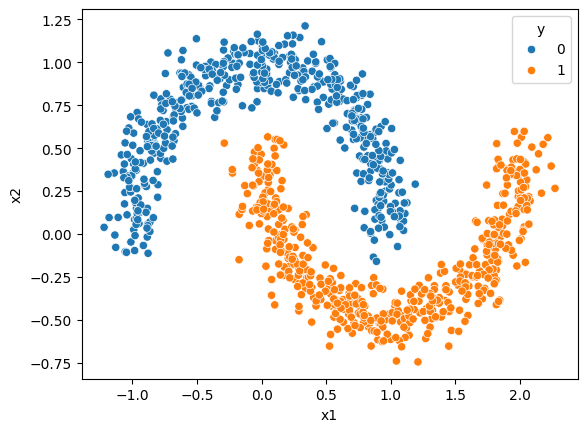

In [ ]:
sns.scatterplot(data = df, x= 'x1', y = 'x2', hue = 'y')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

<IPython.core.display.Javascript object>

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

<IPython.core.display.Javascript object>

'cuda'

In [ ]:
X_train = torch.from_numpy(X_train).type(torch.float)
X_test = torch.from_numpy(X_test).type(torch.float)
y_train = torch.from_numpy(y_train).type(torch.float).unsqueeze(dim = 1)
y_test = torch.from_numpy(y_test).type(torch.float).unsqueeze(dim = 1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### 2. Build a model by subclassing `nn.Module` that incorporates non-linear activation functions and is capable of fitting the data you created in 1.
    * Feel free to use any combination of PyTorch layers (linear and non-linear) you want.

In [ ]:
from torch import nn

class BinaryClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(2,100)
        self.layer2 = nn.Linear(100,10)
        self.layer3 = nn.Linear(10,1)
        self.relu = nn.ReLU()

    def forward (self, x):
        return self.layer3(self.relu(self.layer2(self.layer1(x))))

torch.manual_seed(42)
classifier = BinaryClassifier().to(device)
#classifier.state_dict()

<IPython.core.display.Javascript object>

### 3. Setup a binary classification compatible loss function and optimizer to use when training the model.

In [ ]:
#Loss function
loss_fn = nn.BCEWithLogitsLoss()

#Optimizer
optimizer = torch.optim.Adam(lr = 0.1, params = classifier.parameters())

<IPython.core.display.Javascript object>

In [ ]:
def accuracy_score (y_true, y_pred):
    return (y_true == y_pred).sum().item()/len(y_pred) * 100

### 4. Create a training and testing loop to fit the model you created in 2 to the data you created in 1.
    * To measure model accuracy, you can create your own accuracy function or use the accuracy function in [TorchMetrics](https://torchmetrics.readthedocs.io/en/latest/).
    * Train the model for long enough for it to reach over 96% accuracy.
    * The training loop should output progress every 10 epochs of the model's training and test set loss and accuracy.

In [ ]:
epochs = 50

X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)



train_loss = []
test_loss = []
train_acc = []
test_acc = []
epoch_list = []


for epoch in range(epochs):
  classifier.train()
  y_logits = classifier(X_train)
  y_pred = torch.round(torch.sigmoid(y_logits))
  trn_loss = loss_fn(y_logits, y_train)
  optimizer.zero_grad()
  trn_loss.backward()
  optimizer.step()

  if epoch%10 == 0:
      epoch_list.append(epoch)
      classifier.eval()
      with torch.inference_mode():
          test_logits = classifier(X_test)
          test_pred = torch.sigmoid(test_logits).round()
          tst_loss = loss_fn(test_logits, y_test)

          train_loss.append(trn_loss.item())
          test_loss.append(tst_loss.item())
          test_acc.append(accuracy_score(test_pred, y_test))
          train_acc.append(accuracy_score(y_pred,y_train))

pd.DataFrame({
    'Epoch' : epoch_list,
    'Train Accuracy' : train_acc,
    'Train Loss': train_loss,
    'Test Accuracy' : test_acc,
    'Test Loss': test_loss
})

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Epoch,Train Accuracy,Train Loss,Test Accuracy,Test Loss
0,0,49.466667,0.706184,79.2,0.373436
1,10,88.266667,0.225193,88.0,0.202062
2,20,91.466667,0.155756,94.4,0.121699
3,30,99.333333,0.051464,100.0,0.043488
4,40,100.000000,0.008318,100.0,0.007425


### 5. Make predictions with your trained model and plot them using the plot_decision_boundary() function created in this notebook.

In [ ]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

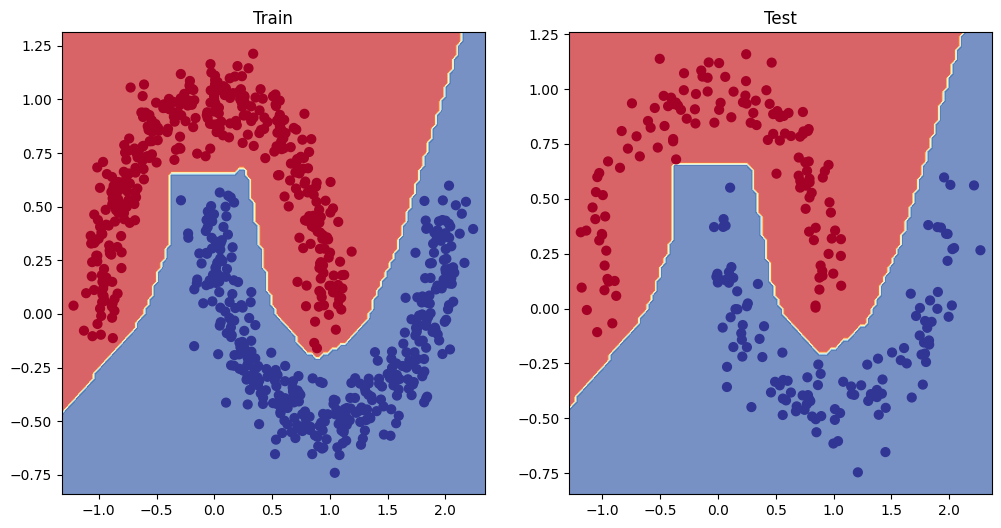

In [ ]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(classifier, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(classifier, X_test, y_test)

Replicate the Tanh (hyperbolic tangent) activation function in pure PyTorch.
Feel free to reference the ML cheatsheet website for the formula.

In [ ]:
def tanh(z):
  from torch import exp as e
  result = (e(z) - e(-z))/(e(z)+e(-z))
  return result

In [ ]:
test_tensor = torch.arange(-2,2,0.1)

<IPython.core.display.Javascript object>

In [ ]:
tanh(test_tensor)


tensor([-0.9640, -0.9562, -0.9468, -0.9354, -0.9217, -0.9051, -0.8854, -0.8617,
        -0.8337, -0.8005, -0.7616, -0.7163, -0.6640, -0.6044, -0.5370, -0.4621,
        -0.3799, -0.2913, -0.1974, -0.0997,  0.0000,  0.0997,  0.1974,  0.2913,
         0.3799,  0.4621,  0.5370,  0.6044,  0.6640,  0.7163,  0.7616,  0.8005,
         0.8337,  0.8617,  0.8854,  0.9051,  0.9217,  0.9354,  0.9468,  0.9562])

<IPython.core.display.Javascript object>

<Axes: xlabel='None', ylabel='None'>

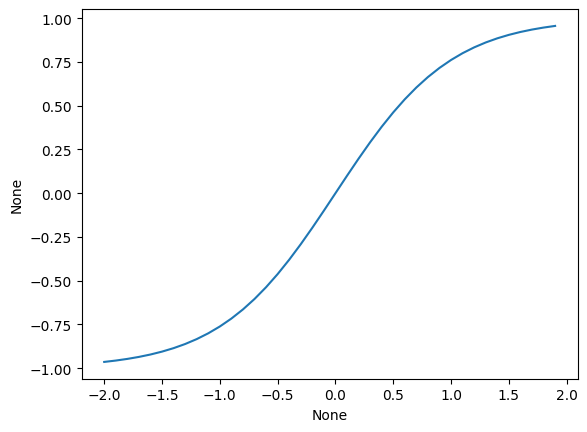

In [ ]:
sns.lineplot(x = test_tensor, y = tanh(test_tensor))

7. Create a multi-class dataset using the [spirals data creation function from CS231n](https://cs231n.github.io/neural-networks-case-study/) (see below for the code).
    * Construct a model capable of fitting the data (you may need a combination of linear and non-linear layers).
    * Build a loss function and optimizer capable of handling multi-class data (optional extension: use the Adam optimizer instead of SGD, you may have to experiment with different values of the learning rate to get it working).
    * Make a training and testing loop for the multi-class data and train a model on it to reach over 95% testing accuracy (you can use any accuracy measuring function here that you like).
    * Plot the decision boundaries on the spirals dataset from your model predictions, the `plot_decision_boundary()` function should work for this dataset too.
    

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

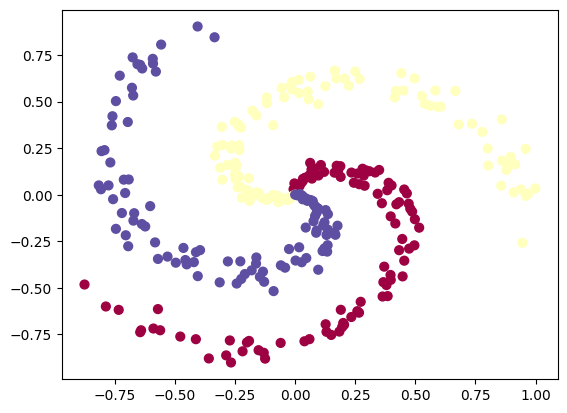

In [ ]:
# Code for creating a spiral dataset from CS231n

N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [ ]:
X[:10]

array([[ 0.00000000e+00,  0.00000000e+00],
       [-1.63606505e-05,  1.01009969e-02],
       [ 3.02190452e-03,  1.99747269e-02],
       [-6.56397665e-03,  2.95835741e-02],
       [-3.74749320e-05,  4.04040230e-02],
       [ 1.86947284e-02,  4.69176646e-02],
       [-3.06875012e-03,  6.05283186e-02],
       [ 2.67300746e-02,  6.54598576e-02],
       [ 3.20878667e-02,  7.41641068e-02],
       [ 3.25669176e-02,  8.48755482e-02]])

In [ ]:
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [ ]:
pd.Series(y).value_counts()

<IPython.core.display.Javascript object>

,count
0,100
1,100
2,100


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

X_train = torch.from_numpy(X_train).type(torch.float)
X_test = torch.from_numpy(X_test).type(torch.float)
y_train = torch.from_numpy(y_train).type(torch.float)
y_test = torch.from_numpy(y_test).type(torch.float)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
class MulticlassClassifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(len(X[0]), 100)
    self.layer2 = nn.Linear(100, 10)
    self.layer3 = nn.Linear(10, len(set(y)))
    self.relu = nn.ReLU()
    self.tanh = nn.Tanh()

  def forward(self, x):
    return self.layer3(self.tanh(self.layer2(self.relu(self.layer1(x)))))

torch.manual_seed(42)
classifier2 = MulticlassClassifier().to(device)


<IPython.core.display.Javascript object>

In [ ]:
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(lr = 0.1, params = classifier2.parameters())

<IPython.core.display.Javascript object>

In [ ]:
torch.manual_seed(42)

epochs = 100

X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

train_loss = []
test_loss = []
train_acc = []
test_acc = []
epoch_list = []

for epoch in range(epochs):
  classifier2.train()
  y_logits = classifier2(X_train)
  y_pred = torch.softmax(y_logits, dim = 1).argmax(dim = 1)
  trn_loss = loss(y_logits, y_train.type(torch.LongTensor).to(device))
  optimizer.zero_grad()
  trn_loss.backward()
  optimizer.step()

  if epoch%20 == 0:
    classifier2.eval()
    with torch.inference_mode():
      test_logits = classifier2(X_test)
      test_pred = torch.softmax(test_logits, dim = 1).argmax(dim = 1)
      tst_loss = loss(test_logits, y_test.type(torch.LongTensor).to(device))

      train_loss.append(trn_loss.item())
      test_loss.append(tst_loss.item())
      test_acc.append(accuracy_score(test_pred, y_test))
      train_acc.append(accuracy_score(y_pred,y_train))
      epoch_list.append(epoch)

pd.DataFrame({
    'Epoch' : epoch_list,
    'Train Accuracy' : train_acc,
    'Train Loss': train_loss,
    'Test Accuracy' : test_acc,
    'Test Loss': test_loss
})

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Epoch,Train Accuracy,Train Loss,Test Accuracy,Test Loss
0,0,33.333333,1.107704,52.0,1.057284
1,20,96.000000,0.109587,100.0,0.051738
2,40,99.111111,0.027602,100.0,0.003713
3,60,99.111111,0.020697,100.0,0.001293
4,80,99.111111,0.020380,100.0,0.000622


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

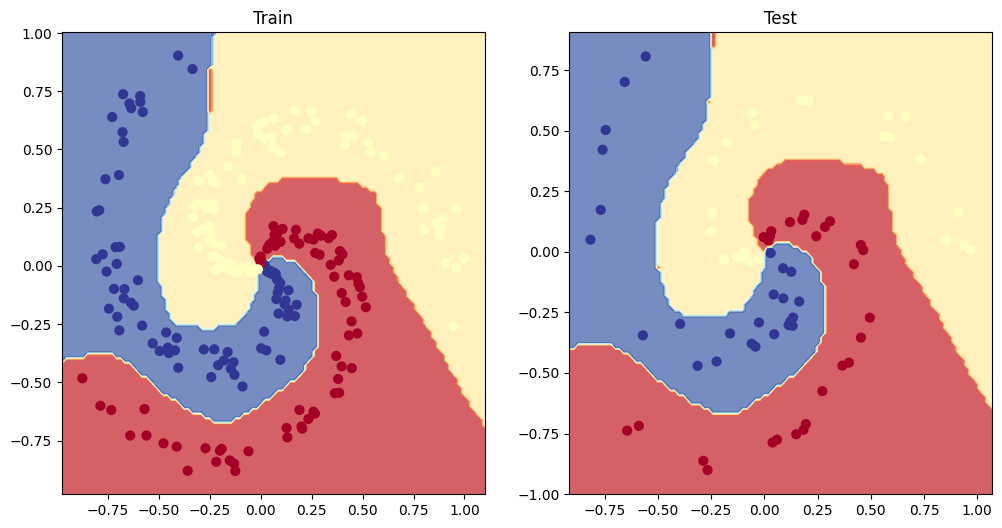

In [ ]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(classifier2, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(classifier2, X_test, y_test)